In [2]:
# Install libraries if not already installed
!pip install pandas numpy matplotlib seaborn scikit-learn nltk


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/adnanaltimeemy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
np.random.seed(42)

n = 1000

brands = np.random.choice(['IKEA', 'Matalan'], n)

age = np.random.randint(18, 70, n)

income = np.random.choice(
    ['Low', 'Medium', 'High'], 
    n, 
    p=[0.4, 0.35, 0.25]
)

gender = np.random.choice(['Male', 'Female'], n)

product_category = np.random.choice(
    ['Furniture', 'Clothing', 'Home Decor', 'Kitchen'], 
    n
)

quantity = np.random.randint(1, 10, n)

price = np.random.uniform(10, 500, n)

cost = price * np.random.uniform(0.4, 0.8, n)

revenue = price * quantity

profit = revenue - (cost * quantity)

profit_margin = (profit / revenue) * 100

# Customer reviews (NLP)
reviews = np.random.choice([
    "Great quality and affordable",
    "Poor quality and expensive",
    "Excellent design and comfort",
    "Not worth the money",
    "Amazing product highly recommend",
    "Bad experience will not buy again",
    "Good value for money",
    "Average quality nothing special"
], n)

df = pd.DataFrame({
    "Brand": brands,
    "Age": age,
    "Income": income,
    "Gender": gender,
    "Category": product_category,
    "Quantity": quantity,
    "Price": price,
    "Cost": cost,
    "Revenue": revenue,
    "Profit": profit,
    "ProfitMargin": profit_margin,
    "Review": reviews
})

df.head()


,Brand,Age,Income,Gender,Category,Quantity,Price,Cost,Revenue,Profit,ProfitMargin,Review
0,IKEA,34,Low,Female,Furniture,4,251.193834,114.227399,1004.775338,547.865743,54.526193,Great quality and affordable
1,Matalan,26,High,Female,Home Decor,1,105.554400,45.165437,105.554400,60.388963,57.211223,Good value for money
2,IKEA,50,Low,Female,Home Decor,9,329.525600,249.570132,2965.730403,719.599215,24.263811,Average quality nothing special
3,IKEA,37,Low,Female,Furniture,5,392.650485,217.973519,1963.252423,873.384826,44.486629,Poor quality and expensive
4,IKEA,30,High,Female,Home Decor,2,397.817135,204.936242,795.634270,385.761787,48.484813,Great quality and affordable


               Age     Quantity        Price         Cost      Revenue  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     43.799000     5.016000   252.387734   149.581625  1254.700636   
std      15.133857     2.548772   141.265914    89.766310  1016.909435   
min      18.000000     1.000000    10.091399     4.287654    13.339202   
25%      31.000000     3.000000   129.595129    72.224268   430.691892   
50%      44.000000     5.000000   254.075126   143.687865   953.244300   
75%      57.000000     7.000000   374.660752   215.294156  1895.644761   
max      69.000000     9.000000   498.485517   388.759730  4486.369654   

            Profit  ProfitMargin  
count  1000.000000   1000.000000  
mean    511.317327     40.557738  
std     458.601597     11.762909  
min       4.271030     20.038020  
25%     161.973292     30.296686  
50%     387.484661     41.110502  
75%     742.436988     50.755404  
max    2365.355387     59.974899  


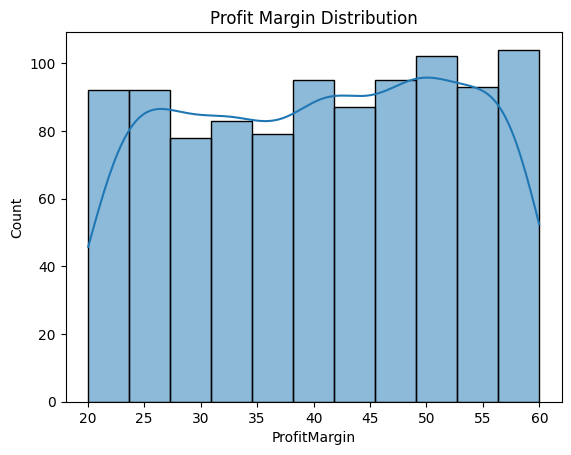

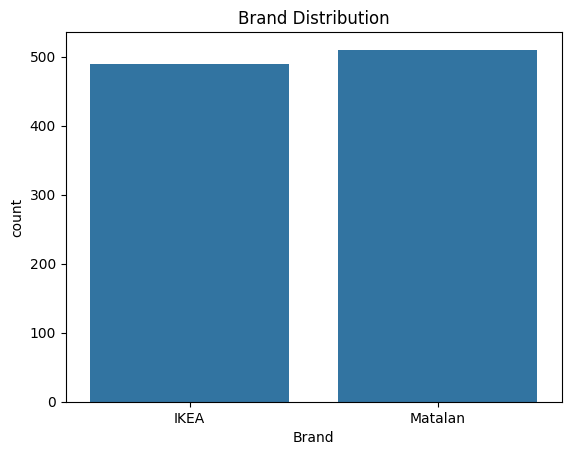

In [5]:
print(df.describe())

sns.histplot(df["ProfitMargin"], kde=True)
plt.title("Profit Margin Distribution")
plt.show()

sns.countplot(x="Brand", data=df)
plt.title("Brand Distribution")
plt.show()


In [6]:
df_encoded = df.copy()

df_encoded["Income"] = df_encoded["Income"].map({
    "Low": 1,
    "Medium": 2,
    "High": 3
})

df_encoded["Gender"] = df_encoded["Gender"].map({
    "Male": 0,
    "Female": 1
})

df_encoded["Brand"] = df_encoded["Brand"].map({
    "IKEA": 0,
    "Matalan": 1
})


In [7]:
features = [
    "Brand",
    "Age",
    "Income",
    "Gender",
    "Quantity",
    "Revenue",
    "ProfitMargin"
]

X = df_encoded[features]


In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


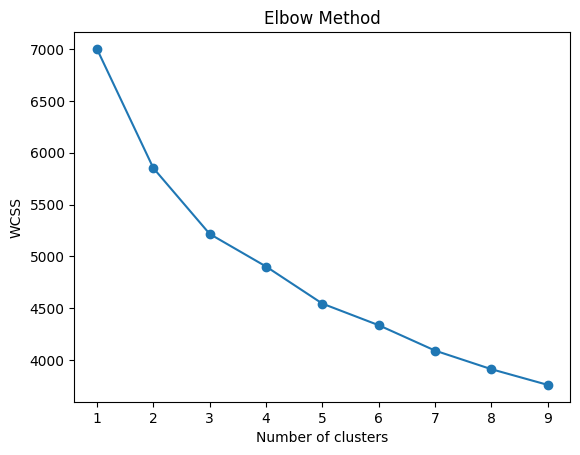

In [9]:
wcss = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 10), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()


In [10]:
kmeans = KMeans(n_clusters=4, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

df.head()


,Brand,Age,Income,Gender,Category,Quantity,Price,Cost,Revenue,Profit,ProfitMargin,Review,Cluster
0,IKEA,34,Low,Female,Furniture,4,251.193834,114.227399,1004.775338,547.865743,54.526193,Great quality and affordable,1
1,Matalan,26,High,Female,Home Decor,1,105.554400,45.165437,105.554400,60.388963,57.211223,Good value for money,3
2,IKEA,50,Low,Female,Home Decor,9,329.525600,249.570132,2965.730403,719.599215,24.263811,Average quality nothing special,2
3,IKEA,37,Low,Female,Furniture,5,392.650485,217.973519,1963.252423,873.384826,44.486629,Poor quality and expensive,1
4,IKEA,30,High,Female,Home Decor,2,397.817135,204.936242,795.634270,385.761787,48.484813,Great quality and affordable,1


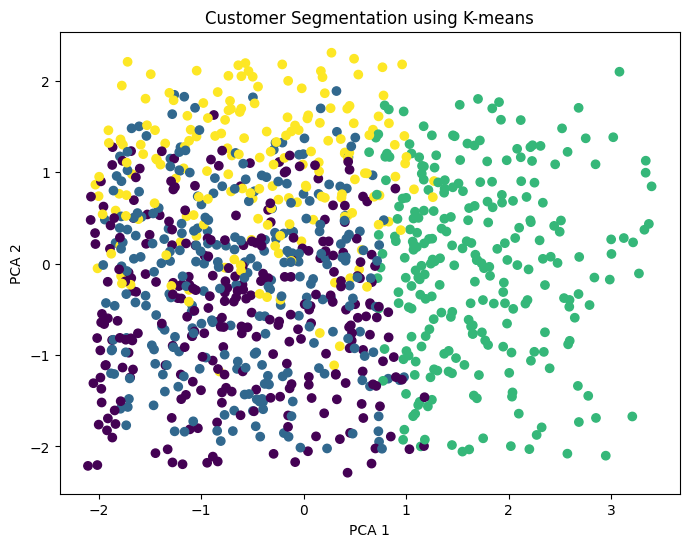

In [11]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=df["Cluster"], cmap="viridis")
plt.title("Customer Segmentation using K-means")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


In [12]:
cluster_summary = df.groupby("Cluster")[[
    "Age", "Revenue", "ProfitMargin"
]].mean()

cluster_summary


,Age,Revenue,ProfitMargin
Cluster,,,
0,40.390071,795.087148,39.837086
1,42.568841,750.940867,39.603576
2,43.635294,2649.189088,40.516704
3,50.978610,789.749536,43.108735


In [13]:
stop_words = stopwords.words('english')

vectorizer = TfidfVectorizer(stop_words=stop_words)

X_text = vectorizer.fit_transform(df["Review"])

print(X_text.shape)


(1000, 22)


In [14]:
kmeans_text = KMeans(n_clusters=3, random_state=42)

df["ReviewCluster"] = kmeans_text.fit_predict(X_text)


In [15]:
terms = vectorizer.get_feature_names_out()

for i in range(3):
    center = kmeans_text.cluster_centers_[i]
    top_words = [terms[ind] for ind in center.argsort()[-10:]]
    
    print(f"\nCluster {i} top words:")
    print(top_words)



Cluster 0 top words:
['average', 'nothing', 'comfort', 'excellent', 'design', 'great', 'affordable', 'poor', 'expensive', 'quality']

Cluster 1 top words:
['excellent', 'design', 'comfort', 'average', 'amazing', 'value', 'worth', 'experience', 'buy', 'bad']

Cluster 2 top words:
['buy', 'bad', 'average', 'amazing', 'product', 'quality', 'good', 'value', 'worth', 'money']


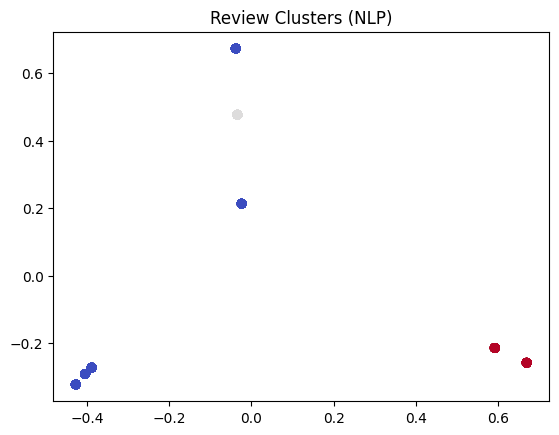

In [16]:
X_text_pca = PCA(n_components=2).fit_transform(X_text.toarray())

plt.scatter(
    X_text_pca[:,0],
    X_text_pca[:,1],
    c=df["ReviewCluster"],
    cmap="coolwarm"
)

plt.title("Review Clusters (NLP)")
plt.show()


In [17]:
df.to_csv("ikea_matalan_sales_dataset.csv", index=False)


In [18]:
print("Average profit margin by brand:")
print(df.groupby("Brand")["ProfitMargin"].mean())

print("\nCluster demographics:")
print(df.groupby("Cluster")["Age"].mean())


Average profit margin by brand:
Brand
IKEA       39.567436
Matalan    41.509204
Name: ProfitMargin, dtype: float64

Cluster demographics:
Cluster
0    40.390071
1    42.568841
2    43.635294
3    50.978610
Name: Age, dtype: float64
